In [1]:
import numpy as np
import matplotlib.pyplot as plt

NX = 100
NY = 100
w_i = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])# weights, note that the last four (edges) 
# are the interpolation points with the highest velocity; weights influence probability density
c_ij = np.array([[0, 1,  0, -1, 0, 1, -1, -1, 1], [0, 0, 1, 0, -1, 1, 1, -1, -1]])# velocities x and y component

In [2]:
u_anm = np.zeros((2,NX,NY))

In [3]:
y = np.arange(0, NY)
L = NY
v = np.sin(2*np.pi/L*y)
# wave along the y-direction at one x

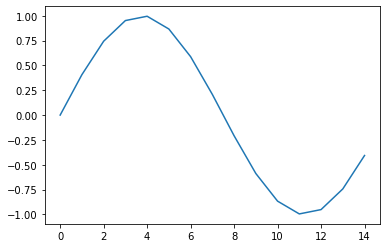

In [6]:
plt.plot(v)

In [30]:
# set initial density
rho = np.zeros((NX, NY))
rho[:,:] = 1 + 0.5 * np.sin(2*np.pi*y/L)
u = np.zeros((2,NX, NY))
#plt.plot(rho)
rho

array([[1.        , 1.03139526, 1.06266662, ..., 0.90630934, 0.93733338,
        0.96860474],
       [1.        , 1.03139526, 1.06266662, ..., 0.90630934, 0.93733338,
        0.96860474],
       [1.        , 1.03139526, 1.06266662, ..., 0.90630934, 0.93733338,
        0.96860474],
       ...,
       [1.        , 1.03139526, 1.06266662, ..., 0.90630934, 0.93733338,
        0.96860474],
       [1.        , 1.03139526, 1.06266662, ..., 0.90630934, 0.93733338,
        0.96860474],
       [1.        , 1.03139526, 1.06266662, ..., 0.90630934, 0.93733338,
        0.96860474]])

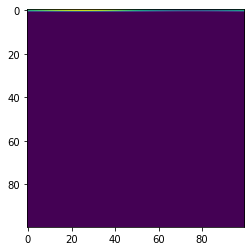

In [7]:
fig, ax = plt.subplots()
ax.imshow(rho)
plt.show()

In [41]:
# simulate the streaming
f_inm = np.einsum('i,jk -> ijk', w_i, np.ones((NX, NY)))# product of two arrays

def dens_lattice_point(f_vxy):
    return np.einsum('vxy -> xy', f_vxy)

def vel_field_lattice_point(f_vxy):
    return 1/dens_lattice_point(f_vxy) * np.einsum('ij, ixy -> jxy', c_ij.T, f_vxy)

def stream(f_ijk):
    # define a velocity vector containing all shifting directions
    c_ij = [[0, 0],[0, 1],[-1, 0],[0, -1], [1, 0], [-1, 1], [-1, -1], [1, -1], [1, 1]]
    for p in range(1,9):
        f_ijk[p] = np.roll(f_ijk[p], shift=c_ij[p], axis=(0,1))
    return f_ijk

f_eq_vxy = np.zeros((9, NX, NY)) # reshape?

def equi_dist(rho, av_vel):
    u_abs = np.einsum('inm, inm -> nm',abs(av_vel),abs(av_vel))
    for j in range(9):
        scal = np.einsum('j, jnm -> nm', c_ij.T[j], av_vel)
        f_eq_vxy[j] = w_i[j] * rho *(1 + 3*scal + 9/2*scal**2- 3/2 * u_abs)
    return f_eq_vxy

def comp_new_dist(f_vxy, f_eq, omega = 1):
    f_vxy += omega * (f_eq - f_vxy)
    # omega describes the impact of the relaxation
    return f_vxy

In [29]:
f_eq = equi_dist(rho, u)

In [35]:
for t in range(1000):
    f_eq = equi_dist(rho, u)
    f_inm = stream(f_inm)
    f_inm = comp_new_dist(f_inm, f_eq, omega = 1)
    rho = dens_lattice_point(f_inm)
    u = vel_field_lattice_point(f_inm)
#give the initial rho and u from 2 ot the initial equilibrium
# set equi in the start, then just do streaming without changing the equi again
# one would expect the wave to decay, as the streaming operation moves the density from each point into the different directions

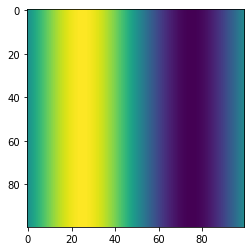

In [36]:
fig, ax = plt.subplots()
ax.imshow(rho)
plt.show()

In [37]:
rho[0]

array([1.        , 1.03139526, 1.06266662, 1.09369066, 1.12434494,
       1.1545085 , 1.18406228, 1.21288965, 1.24087684, 1.2679134 ,
       1.29389263, 1.31871199, 1.34227355, 1.36448431, 1.38525662,
       1.4045085 , 1.42216396, 1.43815334, 1.45241353, 1.46488824,
       1.47552826, 1.48429158, 1.49114363, 1.49605735, 1.49901336,
       1.5       , 1.49901336, 1.49605735, 1.49114363, 1.48429158,
       1.47552826, 1.46488824, 1.45241353, 1.43815334, 1.42216396,
       1.4045085 , 1.38525662, 1.36448431, 1.34227355, 1.31871199,
       1.29389263, 1.2679134 , 1.24087684, 1.21288965, 1.18406228,
       1.1545085 , 1.12434494, 1.09369066, 1.06266662, 1.03139526,
       1.        , 0.96860474, 0.93733338, 0.90630934, 0.87565506,
       0.8454915 , 0.81593772, 0.78711035, 0.75912316, 0.7320866 ,
       0.70610737, 0.68128801, 0.65772645, 0.63551569, 0.61474338,
       0.5954915 , 0.57783604, 0.56184666, 0.54758647, 0.53511176,
       0.52447174, 0.51570842, 0.50885637, 0.50394265, 0.50098

In [39]:
f_inm
# nothing seems to change over time for 1.

array([[[0.44444444, 0.45839789, 0.47229627, ..., 0.40280415,
         0.41659261, 0.430491  ],
        [0.44444444, 0.45839789, 0.47229627, ..., 0.40280415,
         0.41659261, 0.430491  ],
        [0.44444444, 0.45839789, 0.47229627, ..., 0.40280415,
         0.41659261, 0.430491  ],
        ...,
        [0.44444444, 0.45839789, 0.47229627, ..., 0.40280415,
         0.41659261, 0.430491  ],
        [0.44444444, 0.45839789, 0.47229627, ..., 0.40280415,
         0.41659261, 0.430491  ],
        [0.44444444, 0.45839789, 0.47229627, ..., 0.40280415,
         0.41659261, 0.430491  ]],

       [[0.11111111, 0.11459947, 0.11807407, ..., 0.10070104,
         0.10414815, 0.10762275],
        [0.11111111, 0.11459947, 0.11807407, ..., 0.10070104,
         0.10414815, 0.10762275],
        [0.11111111, 0.11459947, 0.11807407, ..., 0.10070104,
         0.10414815, 0.10762275],
        ...,
        [0.11111111, 0.11459947, 0.11807407, ..., 0.10070104,
         0.10414815, 0.10762275],
        [0.1

In [61]:
# now at all x use np.meshgrid
X, Y = np.meshgrid(np.arange(NX),y)
ux = np.sin(2*np.pi/L*Y)
uy = np.zeros((NX, NY))

In [6]:
ux


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06279052,  0.06279052,  0.06279052, ...,  0.06279052,
         0.06279052,  0.06279052],
       [ 0.12533323,  0.12533323,  0.12533323, ...,  0.12533323,
         0.12533323,  0.12533323],
       ...,
       [-0.18738131, -0.18738131, -0.18738131, ..., -0.18738131,
        -0.18738131, -0.18738131],
       [-0.12533323, -0.12533323, -0.12533323, ..., -0.12533323,
        -0.12533323, -0.12533323],
       [-0.06279052, -0.06279052, -0.06279052, ..., -0.06279052,
        -0.06279052, -0.06279052]])

In [7]:
u = np.stack((ux, uy), axis=0)

In [8]:
u.shape

(2, 100, 100)

In [62]:
# second experiment
rho[:,:] = 1
# set x component of u to sinus wave
u[0] = 0.01*np.sin(np.pi/NY*Y)

In [64]:
#for t in range(10):
    #f_eq = equi_dist(rho, u)
f_inm = stream(f_inm)
f_inm = comp_new_dist(f_inm, f_eq, omega = 1)
rho = dens_lattice_point(f_inm)
u = vel_field_lattice_point(f_inm)

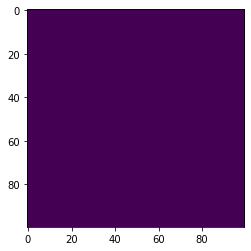

In [65]:
plt.imshow(u[0])

In [67]:
u.shape

(2, 100, 100)

TypeError: Invalid shape (100,) for image data

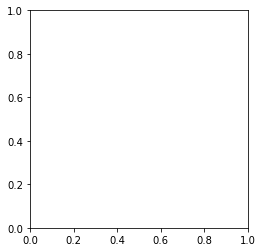

In [18]:
plt.imshow(u[0, :, 50])